# Tentative de Clusterisation des communes situées dans un périmètre de rayon 150 km autour de Lyon

## 1 - Chargement du jeu des données fusionnées hors salaire (geoloc, population, entreprises, consommation) master.csv et filtrage sur Lyon et périmètre 150km

## 2 Pré-traitement des données pour séparer les variables catégorielles des variables quanti

## 3 - Traitement des données en vue d'une Analyse des Composantes principales (PCA

## 4 - Mise en oeuvre de Kmeans pour créer un nombres adaptés de Clusters

## 5 - Intégration du Cluster déterminé pour chaque commune, et positionnement sur une carte pour visualiser comment les clusters sont répartis géographiquement

## 6 - Compréhension de la composition de chaque cluster - profil des villes par cluster ?  

## Partie 1 - Chargement du jeux de données master.csv et packages nécessaires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# pour le pre processing
from utils import spherical_dist
from utils import transform_into_bins
from sklearn.preprocessing import MinMaxScaler

# pour PCA 
from sklearn.decomposition import PCA

# pour le Clustering
from sklearn.cluster import KMeans



In [2]:
df = pd.read_csv('clean_data/master.csv')

df.head()


numero_departement          nom_commune  code_region   nom_region  codgeo  \
0                   1              Ambléon           82  Rhône-Alpes    1006   
1                   1             Ambronay           82  Rhône-Alpes    1007   
2                   1             Ambutrix           82  Rhône-Alpes    1008   
3                   1    Ambérieu-en-Bugey           82  Rhône-Alpes    1004   
4                   1  Ambérieux-en-Dombes           82  Rhône-Alpes    1005   

    latitude  longitude             libgeo_x  nb_ent  nb_ent_0  ...  \
0  45.750000   5.600000              Ambléon     4.0       4.0  ...   
1  46.000000   5.350000             Ambronay   124.0      87.0  ...   
2  45.933333   5.333333             Ambutrix    48.0      28.0  ...   
3  45.950000   5.350000    Ambérieu-en-Bugey   996.0     577.0  ...   
4  46.000000   4.900000  Ambérieux-en-Dombes    99.0      73.0  ...   

   nombre_de_points_libelle_grand_secteur_agriculture  \
0                                                0.0    
1                                               34.0    
2                                                0.0    
3                                                0.0    
4                                               76.0    

   consommation_libelle_grand_secteur_agriculture  \
0                                        0.000000   
1                                     1882.352808   
2                                        0.000000   
3                                        0.000000   
4                                      540.749000   

   nombre_de_points_libelle_grand_secteur_industrie  \
0                                               0.0   
1                                              47.0   
2                                               0.0   
3                                             335.0   
4                                               0.0   

   consommation_libelle_grand_secteur_industrie  \
0                                      0.000000   
1                                   8284.023918   
2                                      0.000000   
3                                  38951.348807   
4                                      0.000000   

   nombre_de_points_libelle_grand_secteur_secteur inconnu  \
0                                                0.0        
1                                               42.0        
2                                                0.0        
3                                              468.0        
4                                              144.0        

   consommation_libelle_grand_secteur_secteur inconnu  \
0                                           0.000000    
1                                         543.530616    
2                                           0.000000    
3                                        4785.467174    
4                                        2296.911000    

   nombre_de_points_libelle_grand_secteur_tertiaire  \
0                                               0.0   
1                                             306.0   
2                                              92.0   
3                                            3205.0   
4                                              56.0   

   consommation_libelle_grand_secteur_tertiaire  \
0                                      0.000000   
1                                  10574.308665   
2                                   1544.815201   
3                                 360212.285712   
4                                    469.940000   

  nombre_de_points_libelle_grand_secteur_résidentiel  \
0                                              359.0   
1                                            13255.0   
2                                             3240.0   
3                                            99410.0   
4                                             3016.0   

   consommation_libelle_grand_secteur_résidentiel  
0                                     2011.133074  
1     

## 1 - Filtrage des communes à 140km de Lyon et Lyon exclus

In [3]:
# selection de la zone géographique à considérer
# calcul de la distance entre la Lyon et les autres communes
# exclusion de Lyon et sélection des communes situées à moins 80km de Lyon

In [4]:
commune = 'Lyon'   # définit Lyon comme centre de cercle
distance = 150      # distance  max  à Lyon

In [5]:


# mise en oeuvre de la fonction spherical_dist de utils permettant de calculer la distance en 2 communes 
# grâce aux longitudes et latitudes de chaque commune 

position1 = df[['latitude', 'longitude']].values
position2 = df[df['libelle_commune'] == commune][['latitude', 'longitude']].values[0, :]

distance_to_Lyon = spherical_dist(position1, position2)
df2 = df.assign(distance_to_Lyon = distance_to_Lyon)

# exclusion de Lyon
df2 = df2[df2['libelle_commune'] != commune]

# sélection des communes dans un périmètre de rayon =  80 km autour de Lyon 
df_lyon = df2[df2['distance_to_Lyon']<distance]

print(df_lyon.shape)
df_lyon.head()

# la zone considérée comprend 1413 communes

df_lyon_sorted = df_lyon.sort_values('pop_total', ascending  = False)
df_lyon_sorted.iloc[0:5, 1:20]



df_lyon.sort_values('pop_total', ascending = False).head(10)


(4069, 75)


numero_departement       nom_commune  code_region   nom_region  codgeo  \
14197                  42     Saint-Etienne           82  Rhône-Alpes   42218   
12650                  38          Grenoble           82  Rhône-Alpes   38185   
24788                  69      Villeurbanne           82  Rhône-Alpes   69266   
22224                  63  Clermont-Ferrand           83     Auvergne   63113   
24791                  69        Vénissieux           82  Rhône-Alpes   69259   
8534                   26           Valence           82  Rhône-Alpes   26362   
26156                  73          Chambéry           82  Rhône-Alpes   73065   
26365                  74            Annecy           82  Rhône-Alpes   74010   
24780                  69    Vaulx-en-Velin           82  Rhône-Alpes   69256   
24743                  69      Saint-Priest           82  Rhône-Alpes   69290   

        latitude  longitude          libgeo_x   nb_ent  nb_ent_0  ...  \
14197  45.433333   4.400000     Saint-Étienne  11663.0    7251.0  ...   
12650  45.166667   5.716667          Grenoble  13207.0    8620.0  ...   
24788  45.766667   4.883333      Villeurbanne   9440.0    6459.0  ...   
22224  45.783333   3.083333  Clermont-Ferrand  10090.0    6092.0  ...   
24791  45.683333   4.883333        Vénissieux   3034.0    1845.0  ...   
8534   44.933333   4.900000           Valence   5923.0    3619.0  ...   
26156  45.566667   5.933333          Chambéry   4753.0    2847.0  ...   
26365  45.900000   6.116667            Annecy   5842.0    3815.0  ...   
24780  45.783333   4.933333    Vaulx-en-Velin   3357.0    2056.0  ...   
24743  45.691667   4.933333      Saint-Priest   3280.0    1773.0  ...   

       consommation_libelle_grand_secteur_agriculture  \
14197                                     1889.007574   
12650                                       66.000000   
24788                                        0.000000   
22224                                      241.679701   
24791                                        0.000000   
8534                                     11810.847125   
26156                                       55.607192   
26365                                      958.451193   
24780                                      126.220795   
24743                                     1254.700419   

       nombre_de_points_libelle_grand_secteur_industrie  \
14197                                            4209.0   
12650                                            3070.0   
24788                                            2644.0   
22224                                            3069.0   
24791                                            1429.0   
8534                                             1530.0   
26156                                            1604.0   
26365                                            3453.0   
24780                                            1860.0   
24743                                            1632.0   

       consommation_libelle_grand_secteur_industrie  \
14197                                  1.587508e+06   
12650                                  7.984736e+05   
24788                                  1.754859e+06   
22224                                  1.652690e+06   
24791                                  8.294173e+05   
8534                                   1.648517e+06   
26156                                  2.093752e+06   
26365                                  2.049444e+06   
24780                                  4.424883e+05   
24743                                  8.220633e+05   

       nombre_de_points_libelle_grand_secteur_secteur inconnu  \
14197                                             6878.0        
12650                                              815.0        
24788                                             5466.0        
22224                                             4405.0        
24791                                             1753.0        
8534                                 

In [6]:


df_lyon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4069 entries, 0 to 26610
Data columns (total 75 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   numero_departement                                                                        4069 non-null   int64  
 1   nom_commune                                                                               4069 non-null   object 
 2   code_region                                                                               4069 non-null   int64  
 3   nom_region                                                                                4069 non-null   object 
 4   codgeo                                                                                    4069 non-null   int64  
 5   latitude                                              

In [7]:
#
# nouvelles lignes  = plutôt que les valeurs brutes des catégories pour 
# "nbr d'entreprises" ; "population", on calcul les parts représentées par chacune des catégories : 

# 1 - pour entreprises et nbr d'entreprises par taille (nbr de salariés) 
for col in df_lyon.columns:
    if 'nb_ent_' in col:  # si nb_ent qui est dans le nom de la colonne, alors on divise la valeur de nb_ent_0 par nb_ent
        df_lyon[col] = df_lyon[col] / df_lyon['nb_ent']

# 2 - pour population et population par tranche d'âge
for col in df_lyon.columns:
    if 'pop_age_' in col:
        df_lyon[col] = df_lyon[col] / df_lyon['pop_total']

# 3  - pour population et genre
for col in df_lyon.columns:
    if 'pop_sexe_' in col:
        df_lyon[col] = df_lyon[col] / df_lyon['pop_total']

# 4 - pour population et mode de cohabitation
for col in df_lyon.columns:
    if 'pop_mode_cohabitation_' in col:
        df_lyon[col] = df_lyon[col] / df_lyon['pop_total']
# 5 - pour conso
for col in df_lyon.columns:
    if 'consommation_libelle_grand_secteur' in col:
        df_lyon[col] = df_lyon[col] / df_lyon['consommation_totale']
 


        

<ipython-input-7-6b3c2d9130c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lyon[col] = df_lyon[col] / df_lyon['nb_ent']
<ipython-input-7-6b3c2d9130c8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lyon[col] = df_lyon[col] / df_lyon['pop_total']
<ipython-input-7-6b3c2d9130c8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [8]:


df_lyon.isna().sum(axis = 0)
df_lyon = df_lyon.dropna(axis = 0, how = 'any')
print(df_lyon.shape)


(4047, 75)


## 2 - Pré-traitement de df_lyon

In [9]:
# PCA ne fonctionne que sur des variables quantitatives, donc on va exclures les variables quali (objets) 
# ainsi que numero_departement et numero_region des int64

df_lyon.columns.to_series().groupby(df_lyon.dtypes).groups

{int64: ['numero_departement', 'code_region', 'codgeo'], float64: ['latitude', 'longitude', 'nb_ent', 'nb_ent_0', 'nb_ent_1-5', 'nb_ent_6-10', 'nb_ent_11-20', 'nb_ent_21-50', 'nb_ent_51-99', 'nb_ent_100-199', 'nb_ent_200-499', 'nb_ent_500+', 'pop_total', 'pop_age_0-5', 'pop_age_5-10', 'pop_age_10-15', 'pop_age_15-20', 'pop_age_20-25', 'pop_age_25-30', 'pop_age_30-35', 'pop_age_35-40', 'pop_age_40-45', 'pop_age_45-50', 'pop_age_50-55', 'pop_age_55-60', 'pop_age_60-65', 'pop_age_65-70', 'pop_age_70-75', 'pop_age_75-80', 'pop_age_80+', 'pop_sexe_homme', 'pop_sexe_femme', 'pop_mode_cohabitation_enfant_dun_couple', 'pop_mode_cohabitation_enfant_dune_famille_monoparentale', 'pop_mode_cohabitation_adulte_dun_couple_sans_enfant', 'pop_mode_cohabitation_adulte_dun_couple_avec_enfant(s)', 'pop_mode_cohabitation_adulte_dune_famille_monoparentale', 'pop_mode_cohabitation_personne_vivant_hors_famille_dans_un_menage_de_plusieurs_personnes', 'pop_mode_cohabitation_personne_vivant_seule', 'code_depart

In [10]:
df_lyon_num = df_lyon.drop(['numero_departement', 'code_region',  
                           'nom_commune', 'nom_region', 'libgeo_x', 'libgeo_y', 'libelle_commune'], axis = 1)


# on va aussi eliminer les 'latitude', 'longitude', 'code_departement', 'distance_to_Lyon'car ces variables 
# ne sont pas utiles pour la PCA , ce ne sont pas des variables explicatives.
# ainsi que toutes les variables à propos du nombre de points, 

df_lyon_num = df_lyon_num.drop(['latitude', 'longitude', 'code_departement', 'distance_to_Lyon'], axis = 1)
df_lyon_num.head()
df_lyon_num.shape





(4047, 64)

In [11]:
df_lyon_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4047 entries, 0 to 26610
Data columns (total 64 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   codgeo                                                                                    4047 non-null   int64  
 1   nb_ent                                                                                    4047 non-null   float64
 2   nb_ent_0                                                                                  4047 non-null   float64
 3   nb_ent_1-5                                                                                4047 non-null   float64
 4   nb_ent_6-10                                                                               4047 non-null   float64
 5   nb_ent_11-20                                          

In [12]:
# on enlève aussi les variables Nbr de points, et les consommations pour ne garder que les consommations par grand secteur 
# hors résidentiel.


df_lyon_num.head()
df_lyon_num.columns

df_lyon_num = df_lyon_num.drop([
                                'nombre_de_points_filiere_electricité', 
                                'consommation_filiere_electricité',
                                'nombre_de_points_filiere_gaz',
                                'consommation_filiere_gaz',
                                'nombre_de_points_libelle_categorie_consommation_entreprises',
                                'consommation_libelle_categorie_consommation_entreprises',
                                'nombre_de_points_libelle_categorie_consommation_non renseigne',
                                'consommation_libelle_categorie_consommation_non renseigne',
                                'nombre_de_points_libelle_categorie_consommation_petits professionels',
                                'consommation_libelle_categorie_consommation_petits professionels',
                                'nombre_de_points_libelle_categorie_consommation_résidentiel',
                                'consommation_libelle_categorie_consommation_résidentiel',
                                'nombre_de_points_libelle_categorie_consommation_résidentiel + petits professionnels',
                                'consommation_libelle_categorie_consommation_résidentiel + petits professionnels',
                                'nombre_de_points_libelle_grand_secteur_agriculture',
                                'nombre_de_points_libelle_grand_secteur_industrie',
                                'nombre_de_points_libelle_grand_secteur_secteur inconnu',
                                'consommation_libelle_grand_secteur_secteur inconnu',
                                'nombre_de_points_libelle_grand_secteur_tertiaire',
                                'nombre_de_points_libelle_grand_secteur_résidentiel',
                                'nombre_de_points_total',
                                'consommation_libelle_grand_secteur_résidentiel'],
                               axis = 1)
df_lyon_num.info()

# il ne reste bien que les consomation grand-secteurs Agricole, Industrie et tertiaire et la conso totale, pour les variables,
# traitant de la consommation en gaz et électricité. 





<class 'pandas.core.frame.DataFrame'>
Int64Index: 4047 entries, 0 to 26610
Data columns (total 42 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   codgeo                                                                                    4047 non-null   int64  
 1   nb_ent                                                                                    4047 non-null   float64
 2   nb_ent_0                                                                                  4047 non-null   float64
 3   nb_ent_1-5                                                                                4047 non-null   float64
 4   nb_ent_6-10                                                                               4047 non-null   float64
 5   nb_ent_11-20                                          

In [13]:
df_lyon_num.head()
# on passe codgeo en index
df_lyon_num.set_index('codgeo', inplace = True)
df_lyon_num.head()

# codgeo est bien en index


nb_ent  nb_ent_0  nb_ent_1-5  nb_ent_6-10  nb_ent_11-20  nb_ent_21-50  \
codgeo                                                                          
1006       4.0  1.000000    0.000000     0.000000      0.000000      0.000000   
1007     124.0  0.701613    0.161290     0.080645      0.040323      0.016129   
1008      48.0  0.583333    0.312500     0.041667      0.062500      0.000000   
1004     996.0  0.579317    0.273092     0.063253      0.046185      0.024096   
1005      99.0  0.737374    0.202020     0.030303      0.010101      0.020202   

        nb_ent_51-99  nb_ent_100-199  nb_ent_200-499  nb_ent_500+  ...  \
codgeo                                                             ...   
1006        0.000000        0.000000        0.000000          0.0  ...   
1007        0.000000        0.000000        0.000000          0.0  ...   
1008        0.000000        0.000000        0.000000          0.0  ...   
1004        0.009036        0.003012        0.002008          0.0  ...   
1005        0.000000        0.000000        0.000000          0.0  ...   

        pop_mode_cohabitation_enfant_dune_famille_monoparentale  \
codgeo                                                            
1006                                             0.047619         
1007                                             0.052673         
1008                                             0.037651         
1004                                             0.076226         
1005                                             0.047022         

        pop_mode_cohabitation_adulte_dun_couple_sans_enfant  \
codgeo                                                        
1006                                             0.380952     
1007                                             0.234101     
1008                                             0.216867     
1004                                             0.237444     
1005                                             0.238245     

        pop_mode_cohabitation_adulte_dun_couple_avec_enfant(s)  \
codgeo                                                           
1006                                             0.190476        
1007                                             0.273117        
1008                                             0.313253        
1004                                             0.228826        
1005                                             0.307210        

        pop_mode_cohabitation_adulte_dune_famille_monoparentale  \
codgeo                                                            
1006                                             0.047619         
1007                                             0.035115         
1008                                             0.033133         
1004                                             0.047697         
1005                                             0.028213         

        pop_mode_cohabitation_personne_vivant_hors_famille_dans_un_menage_de_plusieurs_personnes  \
codgeo                                                                                             
1006                                             0.000000                                          
1007                                             0.052673                                          
1008                                             0.015060                                          
1004                                             0.028975                                          
1005                                             0.015674                                          

        pop_mode_cohabitation_personne_vivant_seule  consommation_totale  \
codgeo                                                                     
1006                                       0.190476         2.011133e+03   
1007                                       0.104565         1.411495e+05   
1008                                       0.106928         3.160548e+0

In [14]:
df_lyon_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4047 entries, 1006 to 74315
Data columns (total 41 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   nb_ent                                                                                    4047 non-null   float64
 1   nb_ent_0                                                                                  4047 non-null   float64
 2   nb_ent_1-5                                                                                4047 non-null   float64
 3   nb_ent_6-10                                                                               4047 non-null   float64
 4   nb_ent_11-20                                                                              4047 non-null   float64
 5   nb_ent_21-50                                       

## 3 - Traitement des données en vue de la mise en oeuvre de l'analyse de composantes et mise en oeuvre

In [15]:
# Les 41 variables ont-elles des échelles identiques ou très différentes

df_lyon_num.describe()

nb_ent     nb_ent_0   nb_ent_1-5  nb_ent_6-10  nb_ent_11-20  \
count   4047.000000  4047.000000  4047.000000  4047.000000   4047.000000   
mean     113.695083     0.749405     0.186251     0.027853      0.019927   
std      456.915496     0.140058     0.110933     0.038859      0.032542   
min        1.000000     0.000000     0.000000     0.000000      0.000000   
25%       12.000000     0.659719     0.125000     0.000000      0.000000   
50%       27.000000     0.745763     0.193798     0.014286      0.000000   
75%       77.000000     0.842105     0.250000     0.046512      0.034483   
max    13207.000000     1.000000     1.000000     0.666667      1.000000   

       nb_ent_21-50  nb_ent_51-99  nb_ent_100-199  nb_ent_200-499  \
count   4047.000000   4047.000000     4047.000000     4047.000000   
mean       0.011699      0.003178        0.001208        0.000414   
std        0.023254      0.009117        0.005667        0.002445   
min        0.000000      0.000000        0.000000        0.000000   
25%        0.000000      0.000000        0.000000        0.000000   
50%        0.000000      0.000000        0.000000        0.000000   
75%        0.017857      0.000000        0.000000        0.000000   
max        0.333333      0.111111        0.166667        0.055556   

       nb_ent_500+  ...  \
count  4047.000000  ...   
mean      0.000065  ...   
std       0.000738  ...   
min       0.000000  ...   
25%       0.000000  ...   
50%       0.000000  ...   
75%       0.000000  ...   
max       0.022222  ...   

       pop_mode_cohabitation_enfant_dune_famille_monoparentale  \
count                                        4047.000000         
mean                                            0.043915         
std                                             0.034974         
min                                             0.000000         
25%                                             0.021978         
50%                                             0.040541         
75%                                             0.059002         
max                                             0.523810         

       pop_mode_cohabitation_adulte_dun_couple_sans_enfant  \
count                                        4047.000000     
mean                                            0.275578     
std                                             0.074927     
min                                             0.000000     
25%                                             0.230345     
50%                                             0.267857     
75%                                             0.313018     
max                                             0.757576     

       pop_mode_cohabitation_adulte_dun_couple_avec_enfant(s)  \
count                                        4047.000000        
mean                                            0.261851        
std                                             0.057852        
min                                             0.000000        
25%                                             0.231818        
50%                                             0.268966        
75%                                             0.300261        
max                                             0.500000        

       pop_mode_cohabitation_adulte_dune_famille_monoparentale  \
count                                        4047.000000         
mean                                            0.029531         
std                                             0.021836         
min                                             0.000000         
25%                                             0.016696         
50%                                             0.028103         
75%                                             0.039188         
max                                             0.333333         

       pop_mode_cohabitation_personne_vivant_hors_famille_dans_un_menage_de_plusieurs_personnes  \
count                       

In [16]:
#Les échelles ne sont pas du tout les mêmes, il va falloir normaliser df_lyon_num en vue de la PCA.


## 3 - pretraitement en vue de la mise en oeuvre de l'analyse de composantes principales PCA

In [17]:
# recherche de NaN

df_lyon_num.isna().sum(axis = 0)



nb_ent                                                                                      0
nb_ent_0                                                                                    0
nb_ent_1-5                                                                                  0
nb_ent_6-10                                                                                 0
nb_ent_11-20                                                                                0
nb_ent_21-50                                                                                0
nb_ent_51-99                                                                                0
nb_ent_100-199                                                                              0
nb_ent_200-499                                                                              0
nb_ent_500+                                                                                 0
pop_total                                                   

In [18]:
# normalisation de df_lyon_num avec MinMaxScaler: 
# création du scaler

scaler = MinMaxScaler()

# normalisation de df_lyon_num : 
df_lyon_num_scaled = scaler.fit_transform(df_lyon_num)

# ceci a créé un nparray
print('création du np array df_lyon_num_scaled : ', df_lyon_num_scaled.shape)

création du np array df_lyon_num_scaled :  (4047, 41)


## 4 - Mise en oeuvre de Kmeans pour créer un nombres adaptés de Clusters
### Option avec le résultat de PCA et sans PCA

In [19]:

# Instanciation d'une PCA

pca = PCA()

# l'intance pca est appliquée aux données avec la méthode fit_transform() (applique la réduction de dimension sur le np array)

coord = pca.fit_transform(df_lyon_num_scaled)
coord


array([[ 3.19064361e-01, -2.15170264e-01, -6.13348184e-02, ...,
         4.99959947e-17,  7.90684560e-17, -4.16719269e-17],
       [-8.55407457e-02,  1.16603652e-02,  8.39359761e-02, ...,
         2.09851535e-16,  3.76868396e-16,  3.38317250e-16],
       [-2.29409590e-01,  1.15562036e-01,  1.05952557e-01, ...,
         1.17936231e-16,  1.44549119e-16,  7.20053946e-17],
       ...,
       [-2.42809862e-01,  6.82227211e-02,  2.25037549e-01, ...,
         1.75361230e-17, -4.36804661e-18,  1.99642610e-17],
       [-1.20002972e-01,  1.44338551e-01,  1.29479571e-01, ...,
         2.79115476e-17,  2.20417783e-17,  4.45206612e-18],
       [-4.83253854e-02,  1.26641413e-02, -1.03761289e-02, ...,
         8.77915216e-17, -2.07355868e-18,  8.31269193e-18]])

In [20]:
# variance expliquée pour chaque variable

len(pca.explained_variance_)  #on a bien 1 variance expliquée pour chacune des 41 variables

41

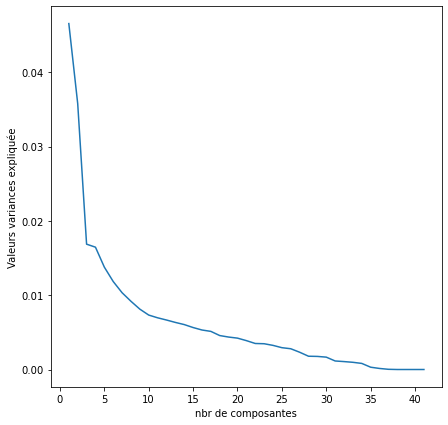

In [21]:
# variance expliquée en fonction du nombre de composante : graphique : 
plt.figure(figsize = (7,7))
plt.plot(np.arange(1,42), pca.explained_variance_)
plt.xlabel('nbr de composantes')
plt.ylabel('Valeurs variances expliquée')
plt.show()

# on note une cassure , un coude à partir pour 2 voire 3 composantes. 

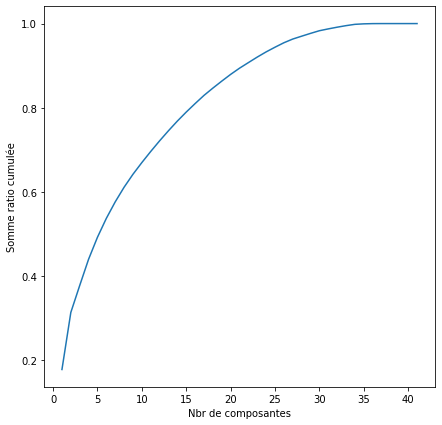

In [22]:
# on vérifie avec la somme cumulée du ratio de la varianlce expliquée en fonction du nombre de composantes

# calcu des ratios : 
len(pca.explained_variance_ratio_)

# graph de la somme cumulée des ratios en fonction du nbr de composantes

plt.figure(figsize =(7,7))
plt.plot(np.arange(1,42), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nbr de composantes')
plt.ylabel('Somme ratio cumulée')
plt.show()

<ipython-input-23-6e591659eb9f>:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9', 'PC10' ,'Autres'],


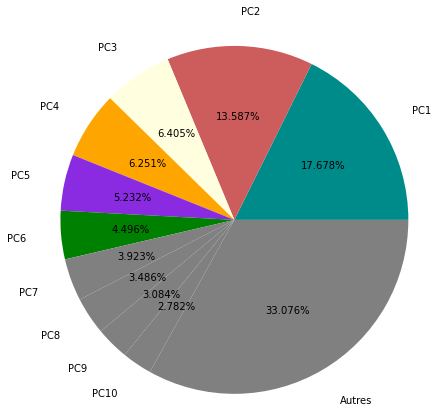

In [23]:
L1 = list(pca.explained_variance_ratio_[0:10])
L1
L1.append(sum(pca.explained_variance_ratio_[10:42]))
L1

plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9', 'PC10' ,'Autres'],
        colors = ['darkcyan', 'indianred', 'lightyellow', 'orange', 'blueviolet', 'green', 'grey', 'grey','grey', 'grey', 'grey'],
        autopct='%1.3f%%', radius=2, labeldistance=1.2)
#plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Autres'], autopct='%1.3f%%', radius=2, labeldistance=1.2)
plt.title('')
plt.show()

In [24]:
# A partir de 5 composantes principales, on est à 50 % des ratios de variances expliquées cumulées.
# Avec 2 composantes principales on est  à 30% de variance expliquée cumulée,  
# Mais leur ration est égale à plus du double du ration des autres composantes

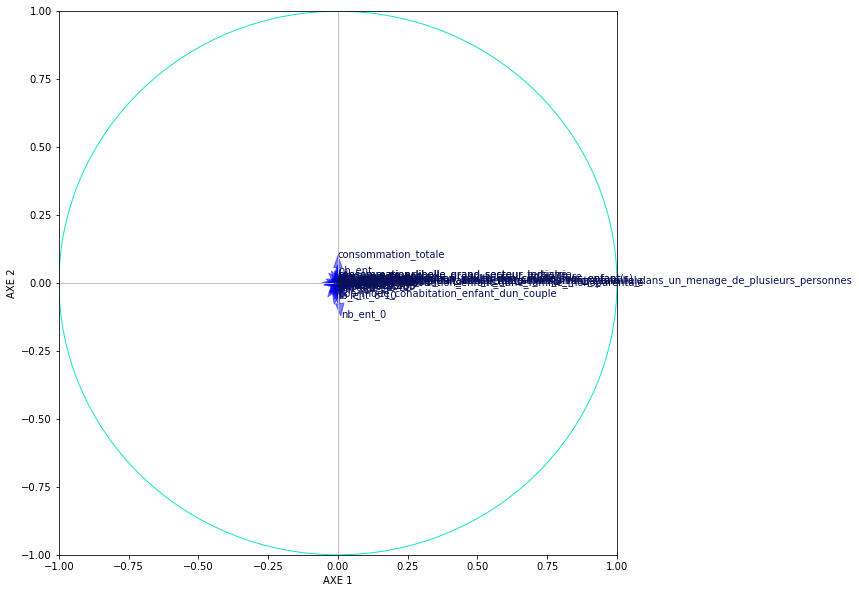

In [25]:
# Cercle des corrélations (évaluer l'influence de chaque variable pour chacun des 2 axes)

racine_valeurs_propres = np.sqrt(pca.explained_variance_)
corvar = np.zeros((41, 41))
for k in range(41):
    corvar[:, k] = pca.components_[:, k] * racine_valeurs_propres[k]

# Délimitation de la figure
fig, axes = plt.subplots(figsize=(10, 10))
# plt.figure(figsize = (20,20))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# plt.xlim(-1,1)
# plt.ylim(-1,1)

# Affichage des variables
for j in range(41):
    plt.annotate(df_lyon_num.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6, alpha=0.5, head_width=0.03, color='b')

# Ajout des axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Cercle et légendes

cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2')
plt.show()

# question pour Paul - comment agrandir ce cercle c'est illisible 

In [26]:
### 4.1 - Corrélation des 2 composantes principales avec les autres variables

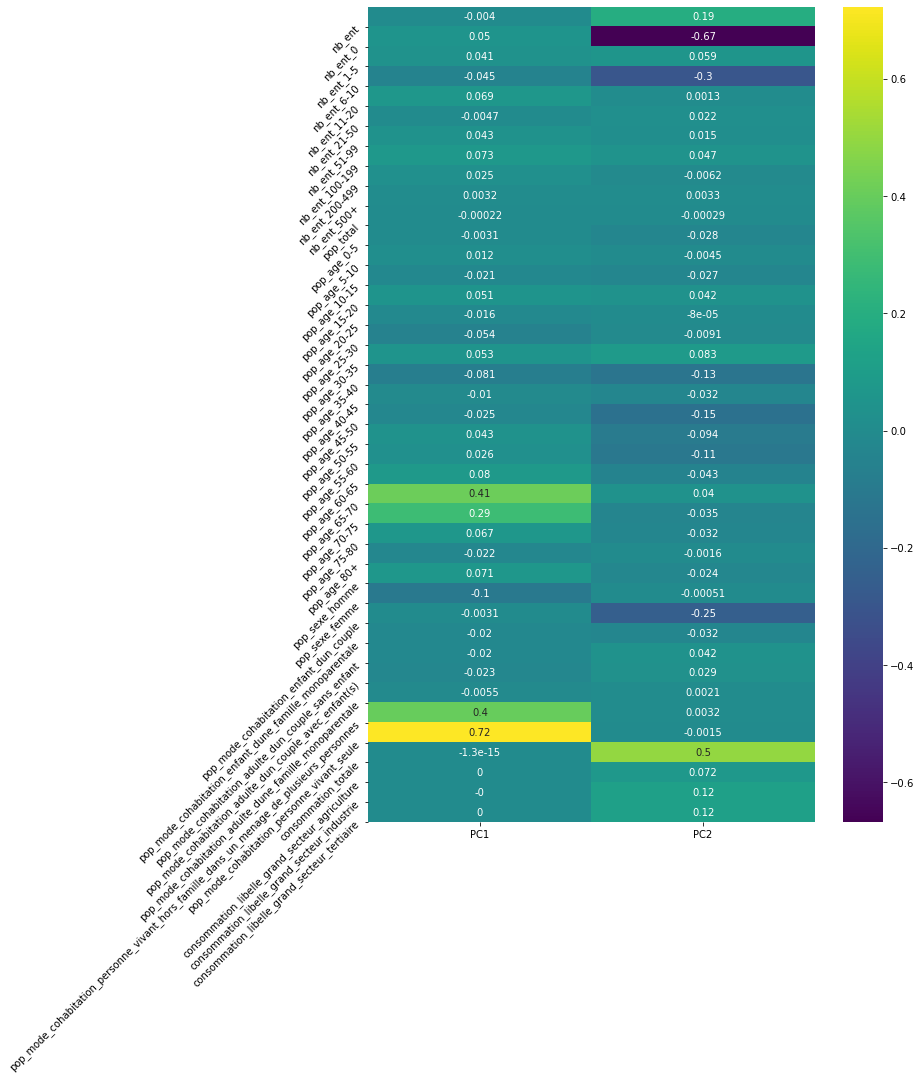

In [27]:
# Afficher les coeficients de corrélations de chaque variables
# avec les deux premières CP  = (les 2 premiers axes)
# grâce à l'attribut components_ de pca

Comp_PCA = pd.DataFrame({'PC1': pca.components_[:, 0], 'PC2': pca.components_[:, 1]}, index = df_lyon_num.columns)

plt.figure(figsize=(10, 15))

sns.heatmap(Comp_PCA, annot=True, cmap='viridis')
plt.yticks(np.arange(1,42), df_lyon_num.columns, rotation = 45)
plt.show()


In [28]:
print('la variable la plus positivement corrélée à la Première Composante est  : ', 
      Comp_PCA['PC1'].idxmax(), 'de valeur : ',Comp_PCA['PC1'].max())
print('la variable la plus négativement corrélée à la Première Composante est  : ', 
      Comp_PCA['PC1'].idxmin(), 'de valeur : ', Comp_PCA['PC1'].min())

print('la variable la plus positivement corrélée à la Deuxième Composante est  : ', 
      Comp_PCA['PC2'].idxmax(), 'de valeur : ',Comp_PCA['PC2'].max())
print('la variable la plus négativement corrélée à la Deuxième Composante est  : ', 
      Comp_PCA['PC2'].idxmin(), 'de valeur : ', Comp_PCA['PC2'].min())


la variable la plus positivement corrélée à la Première Composante est  :  pop_mode_cohabitation_personne_vivant_seule de valeur :  0.7233131631578388
la variable la plus négativement corrélée à la Première Composante est  :  pop_sexe_femme de valeur :  -0.10494334037988354
la variable la plus positivement corrélée à la Deuxième Composante est  :  consommation_totale de valeur :  0.4958239771078456
la variable la plus négativement corrélée à la Deuxième Composante est  :  nb_ent_0 de valeur :  -0.6679287700278248


In [29]:
# quelle ville dans df_lyon a un nbr_ent  = 0 ?
# df_lyon.loc[df_lyon['nb_ent'] == 0]
# on supprime cette ligne de df_lyon, qui aura ainsi les mêmes lignes exactement que Coord issue de l'analyse des composantes Pales
# df_lyon = df_lyon.loc[df_lyon['nb_ent'] != 0]
# df_lyon.isna().sum(axis = 0)
# df_lyon = df_lyon.dropna(axis = 0, how = 'any')
df_lyon.shape


(4047, 75)

In [30]:
# affichage graphique en nuage des points pour les deux composantes PC1 et PC2
# créer un DataFrame pca_lyon_distance avec les coordonnées des 2 axes principaux et la distance à Lyon

distance_lyon = df_lyon['distance_to_Lyon']
nom_commune = df_lyon['nom_commune']
latitude = df_lyon['latitude']
longitude = df_lyon['longitude']

pca_lyon_distance = pd.DataFrame({'Axe 1': coord[:,0], 'Axe 2' : coord[:,1], 
                                  'distance_to_Lyon' : distance_lyon,
                                 'nom_commune' : nom_commune,
                                 'latitude' : latitude,
                                 'longitude' : longitude})
pca_lyon_distance.head()
print(pca_lyon_distance.shape)





(4047, 6)


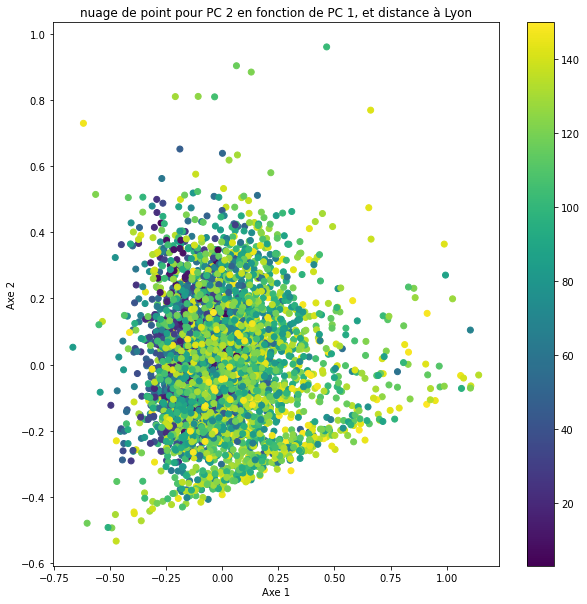

In [31]:
plt.figure(figsize = (10,10))

plt.scatter(pca_lyon_distance['Axe 1'], pca_lyon_distance['Axe 2'],
           c = pca_lyon_distance['distance_to_Lyon']
           )
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.title('nuage de point pour PC 2 en fonction de PC 1, et distance à Lyon')
# plt.annotate("Saint-Etienne", xy = (5.990848,-0.405483 ), xytext = (5.5, -0.35))
# plt.annotate("Villeurbanne", xy = (5.096273,-0.211655), xytext = (5, -0.15))
# plt.annotate("Saint-Quantin-Fallavier", xy = (0.428808,0.550380), xytext = (0.5,0.6))
# plt.annotate("Saint-Priest", xy = (2.125354,1.020063), xytext = (2.1, 0.98))
plt.colorbar()
plt.show()

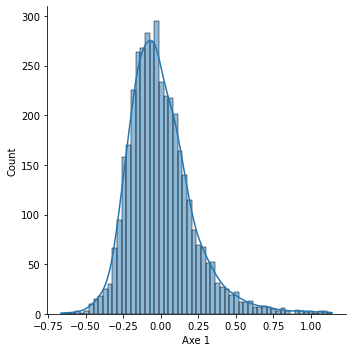

In [32]:
# regardons la distribution pour la variables les plus corrélées avec la Composantes principales Axe 1: personnes vivant seules
sns.displot(x = 'Axe 1' , data = pca_lyon_distance, kde = True)


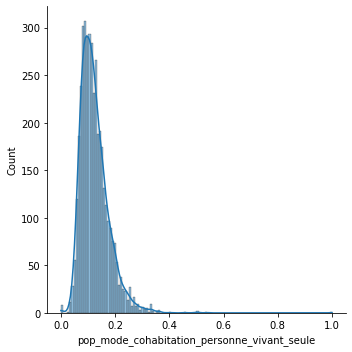

In [33]:
sns.displot(x = 'pop_mode_cohabitation_personne_vivant_seule', data = df_lyon, kde = True)

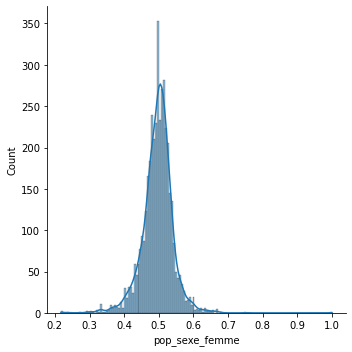

In [34]:

sns.displot(x = 'pop_sexe_femme', data = df_lyon, kde = True)

In [35]:
df_lyon[['nom_commune', 'pop_total',
         'pop_mode_cohabitation_personne_vivant_seule','nb_ent', 'nb_ent_0']].sort_values('pop_mode_cohabitation_personne_vivant_seule', 
                                                                     ascending  = False).head(10)

nom_commune  pop_total  \
12774           Oulles        7.0   
12528            Ambel       13.0   
25548  Montceaux-Ragny       20.0   
8326           Gumiane       20.0   
12548            Besse      120.0   
25428         Fontenay       25.0   
2039         Roux (Le)       52.0   
1653         Montbrand       55.0   
1401             Vichy    24585.0   
1938           Dompnac       70.0   

       pop_mode_cohabitation_personne_vivant_seule  nb_ent  nb_ent_0  
12774                                     1.000000     2.0  1.000000  
12528                                     0.538462     2.0  1.000000  
25548                                     0.500000     2.0  1.000000  
8326                                      0.500000     1.0  1.000000  
12548                                     0.458333     9.0  0.777778  
25428                                     0.400000     1.0  1.000000  
2039                                      0.365385     9.0  1.000000  
1653                                      0.363636     9.0  1.000000  
1401                                      0.361643  2413.0  0.631579  
1938                                      0.357143     8.0  0.875000

In [36]:
# représentation des Composantes Principales en fonction des coordonnées géographiques de chaque communes

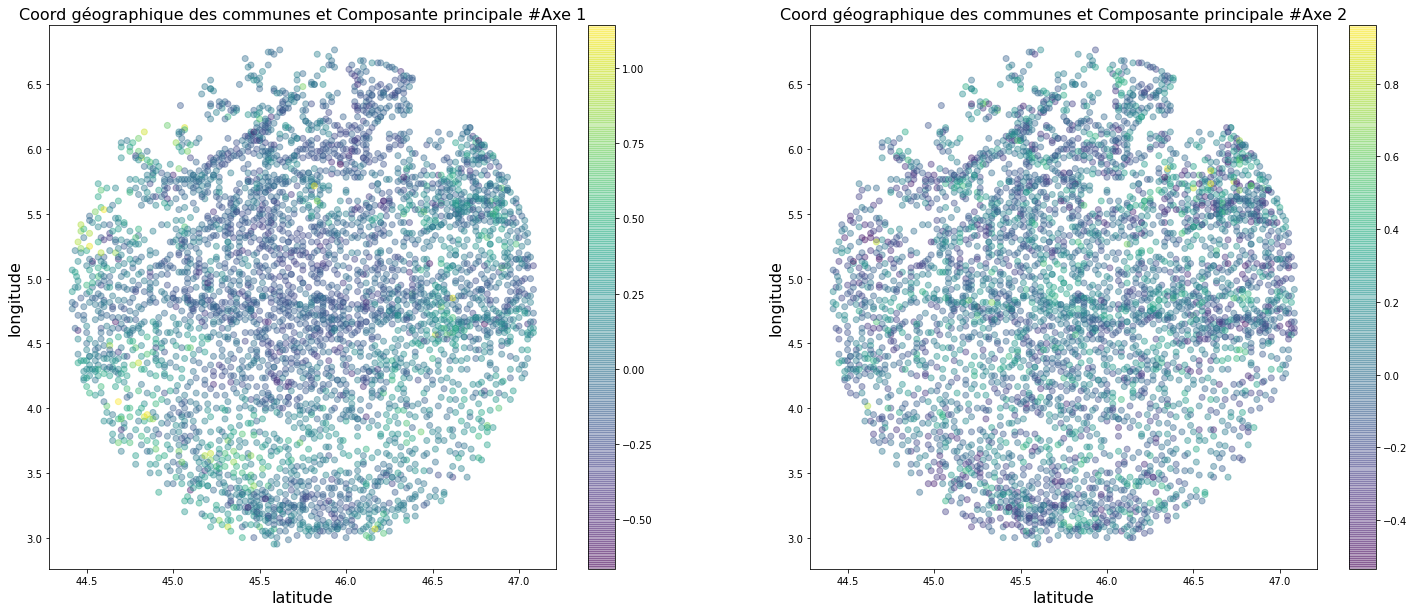

In [37]:

plt.figure(figsize = (25,10))
plt.subplot(121)  
plt.scatter(
    pca_lyon_distance['latitude'],
    pca_lyon_distance['longitude'],
    c=pca_lyon_distance['Axe 1'],
    alpha = 0.4
)

# plt.xlim(0,3)
# plt.ylim(-0.5,0.5)
plt.xlabel('latitude', fontsize = 16)
plt.ylabel('longitude', fontsize = 16)
plt.title('Coord géographique des communes et Composante principale #Axe 1', fontsize = 16)
plt.colorbar()

plt.subplot(122)
plt.scatter(
    pca_lyon_distance['latitude'],
    pca_lyon_distance['longitude'],
    c=pca_lyon_distance['Axe 2'],
    alpha = 0.4
)

# plt.xlim(0,3)
# plt.ylim(-0.5,0.5)
plt.xlabel('latitude', fontsize = 16)
plt.ylabel('longitude', fontsize = 16)
plt.title('Coord géographique des communes et Composante principale #Axe 2', fontsize = 16)
plt.colorbar()
plt.show()



In [38]:
### 4.2 K-Means avec 2 composantes principales et en essayant avec n_clusters = 4

In [39]:
# mise en oeuvre de K-means à partir des 2 composantes principale , Comp_PCA
pca_lyon_kmeans_2PC = pd.DataFrame({'Axe 1': coord[:,0], 'Axe 2' : coord[:,1]})
print(pca_lyon_kmeans_2PC.shape)


(4047, 2)


In [40]:
# instanciation de kmeans - essai avec 4 clusters
kmeans_2PC = KMeans(n_clusters = 4)


# entrainement sur Comp_PCA
kmeans_2PC.fit(pca_lyon_kmeans_2PC)

# Prédictions
y_kmeans_2PC = kmeans_2PC.predict(pca_lyon_kmeans_2PC)
print(y_kmeans_2PC)

# coordonnées des centres des clusters
kmeans_2PC.cluster_centers_

x_cluster_centers = kmeans_2PC.cluster_centers_[:,0]
y_cluster_centers = kmeans_2PC.cluster_centers_[:,1]

print(x_cluster_centers)
print(y_cluster_centers)

print("la valeur de l'inertie por le modèle est : ", kmeans_2PC.inertia_)
print(len(y_kmeans_2PC))

[3 0 0 ... 0 1 0]
[-0.17939318 -0.02409221  0.0698525   0.44545001]
[-0.07565251  0.21259504 -0.13577867 -0.00473171]
la valeur de l'inertie por le modèle est :  120.81147531694262
4047


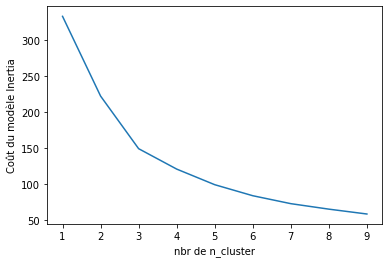

In [41]:
# choix du nombre de clusters optimal 

L = []
for i in range (1,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_lyon_kmeans_2PC)
    L.append(kmeans.inertia_)

plt.plot(range(1,10), L)
plt.xlabel('nbr de n_cluster')
plt.ylabel('Coût du modèle Inertia')
plt.show()


In [42]:
# on a un coude à n-clusters = 3 et à n_clusters = 4

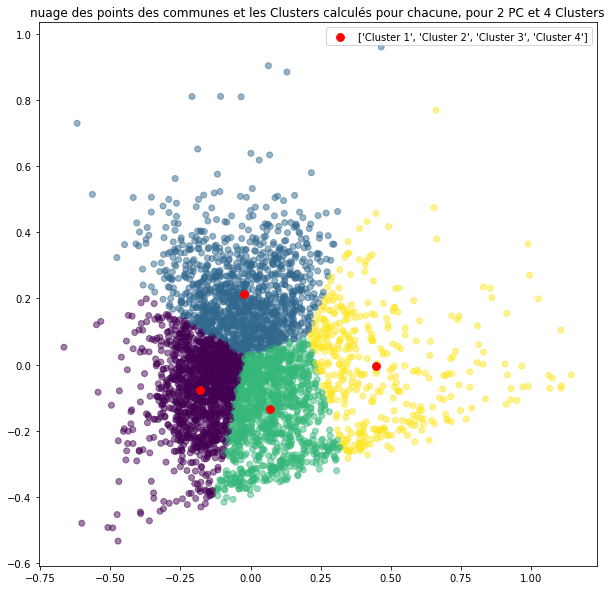

In [43]:
# représentation graphique
plt.figure(figsize = (10,10))
plt.scatter(pca_lyon_kmeans_2PC['Axe 1'], pca_lyon_kmeans_2PC['Axe 2'],alpha = 0.5, c = y_kmeans_2PC)
plt.scatter(x_cluster_centers, y_cluster_centers, c = 'red', s = 60,label = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title("nuage des points des communes et les Clusters calculés pour chacune, pour 2 PC et 4 Clusters")
plt.legend()
plt.show()

In [44]:
# A priori o peut affiner - on va faire varier le nombre de variables (Composantes Principales) et le nombre de Cluster
kmeans.score(pca_lyon_kmeans_2PC)

-58.39603126727053

## 4 - Mise en oeuvre de Kmeans pour créer un nombres adaptés de Clusters
### Option avec le résultat de PCA et sans PCA

In [48]:
n_variable = 10
n_cluster = 3

In [63]:
# mise en oeuvre de K-means à partir des 2 composantes principale , Comp_PCA
# pca_lyon_kmeans = pd.DataFrame({'Axe 1': coord[:,0], 'Axe 2' : coord[:,1]})
# print(pca_lyon_kmeans.shape)

# Universalisation de la mise en oeuvre du modèle de KMeans 
pca_lyon_kmeans = pd.DataFrame({"Axe " + str(i + 1): coord[:,i] for i in range(n_variable)})

# instanciation de kmeans - essai avec 3 clusters
# kmeans = KMeans(n_clusters = 3)
kmeans = KMeans(n_clusters = n_cluster)

# entrainement sur Comp_PCA
kmeans.fit(pca_lyon_kmeans)

# Prédictions
y_kmeans = kmeans.predict(pca_lyon_kmeans)
print(len(y_kmeans))

# coordonnées des centres des clusters
kmeans.cluster_centers_

x_cluster_centers = kmeans.cluster_centers_[:,0]
y_cluster_centers = kmeans.cluster_centers_[:,1]

print(x_cluster_centers)
print(y_cluster_centers)

print("la valeur de l'inertie por le modèle est : ", kmeans.inertia_)
print(len(y_kmeans))
print(kmeans.score(pca_lyon_kmeans))


4047
[-0.04346737  0.31571781 -0.1017435 ]
[ 0.20530653 -0.04594736 -0.111415  ]
la valeur de l'inertie por le modèle est :  527.1062531185828
4047
-527.1062531185828


In [50]:
pca_lyon_kmeans.head(5)

Axe 1     Axe 2     Axe 3     Axe 4     Axe 5     Axe 6     Axe 7  \
0  0.319064 -0.215170 -0.061335 -0.162907  0.102688  0.027440  0.090845   
1 -0.085541  0.011660  0.083936  0.002902  0.022940 -0.030106  0.013446   
2 -0.229410  0.115562  0.105953  0.120645  0.138926  0.141088 -0.008405   
3 -0.041412  0.265376  0.136452 -0.007008  0.218216 -0.022902  0.061597   
4 -0.122429 -0.034119 -0.059376  0.013521  0.096395  0.152880 -0.010842   

      Axe 8     Axe 9    Axe 10  
0 -0.065021 -0.253966 -0.080493  
1 -0.001935  0.001739  0.005844  
2 -0.102509 -0.097206 -0.020705  
3  0.120503 -0.015581  0.013655  
4 -0.064261  0.085590 -0.000410

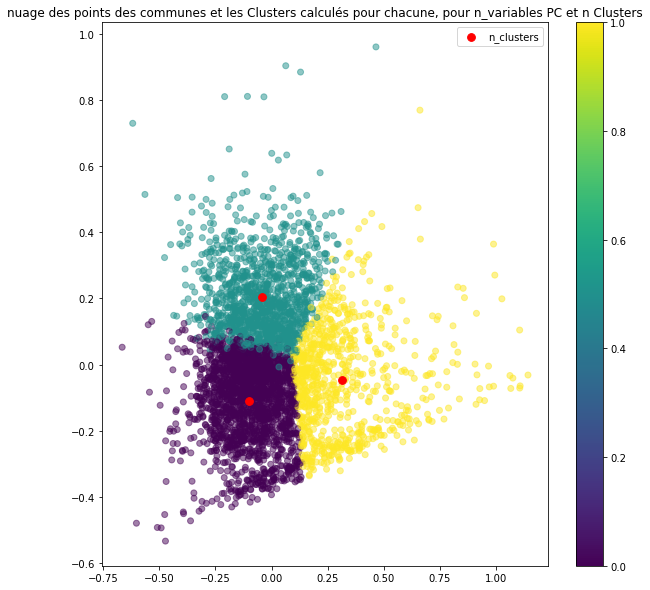

In [51]:
# représentation graphique
plt.figure(figsize = (10,10))
plt.scatter(pca_lyon_kmeans['Axe 1'], pca_lyon_kmeans['Axe 2'], alpha = 0.5, c = y_kmeans)
plt.scatter(x_cluster_centers, y_cluster_centers, c = 'red', s = 60, label = 'n_clusters')
plt.title("nuage des points des communes et les Clusters calculés pour chacune, pour n_variables PC et n Clusters")
plt.legend()
plt.colorbar()

plt.show()

In [52]:
coord.shape


(4047, 41)

## 5 - Intégration du Cluster déterminé pour chaque commune, et positionnement sur une carte pour visualiser comment les clusters sont répartis géographiquement 


In [53]:

personne_seule = df_lyon['pop_mode_cohabitation_personne_vivant_seule']
entreprise_0_sal = df_lyon['nb_ent_0']

nb_ent = df_lyon['nb_ent']
population_total =df_lyon['pop_total']
pop_enfants_0_20 = df_lyon['pop_age_0-5'] + df_lyon['pop_age_5-10'] + df_lyon['pop_age_10-15'] + df_lyon['pop_age_15-20']
pop_adultes_20_40 = df_lyon['pop_age_20-25'] + df_lyon['pop_age_25-30'] + df_lyon['pop_age_30-35'] + df_lyon['pop_age_35-40']
pop_adultes_40_60 = df_lyon['pop_age_40-45'] + df_lyon['pop_age_45-50'] + df_lyon['pop_age_50-55'] + df_lyon['pop_age_55-60']
pop_adultes_60_80plus = df_lyon['pop_age_60-65'] + df_lyon['pop_age_65-70'] + df_lyon['pop_age_70-75'] +df_lyon['pop_age_80+'] + df_lyon['pop_age_75-80']
  
pca_lyon_kmeans = pd.DataFrame({
                                  'distance_to_Lyon' : distance_lyon,
                                 'nom_commune' : nom_commune,
                                 'latitude' : latitude,
                                 'longitude' : longitude,
                                 'cluster' : y_kmeans,
                                 'ent_0_sal': entreprise_0_sal,
                                 'nb_ent' : nb_ent,
                                 'personne_seule' : personne_seule,
                                'population_total' : population_total,
                                'pop_enfants_0_20' : pop_enfants_0_20,
                                'pop_adultes_20_40' : pop_adultes_20_40,
                                'pop_adultes_40_60' : pop_adultes_40_60,
                                 'pop_adultes_60_80plus' :pop_adultes_60_80plus
                              })

pca_lyon_kmeans.head(10)

distance_to_Lyon          nom_commune   latitude  longitude  cluster  \
0         58.180331              Ambléon  45.750000   5.600000        2   
1         47.645751             Ambronay  46.000000   5.350000        0   
2         42.621344             Ambutrix  45.933333   5.333333        1   
3         44.647413    Ambérieu-en-Bugey  45.950000   5.350000        1   
4         28.060893  Ambérieux-en-Dombes  46.000000   4.900000        0   
5         62.279727     Andert-et-Condon  45.800000   5.650000        0   
6         76.507661            Anglefort  45.916667   5.808333        1   
7         80.596763             Apremont  46.208333   5.658333        0   
8         57.476183                Aranc  46.000000   5.500000        1   
9         51.820362              Arandas  45.900000   5.483333        2   

   ent_0_sal  nb_ent  personne_seule  population_total  pop_enfants_0_20  \
0   1.000000     4.0        0.190476              84.0          0.190476   
1   0.701613   124.0        0.104565            2563.0          0.263363   
2   0.583333    48.0        0.106928             664.0          0.257530   
3   0.579317   996.0        0.166493           13460.0          0.267756   
4   0.737374    99.0        0.078370            1595.0          0.228840   
5   0.772727    22.0        0.082353             340.0          0.270588   
6   0.696970    33.0        0.109091            1100.0          0.307273   
7   0.785714    14.0        0.060606             396.0          0.313131   
8   0.666667    12.0        0.128205             312.0          0.205128   
9   1.000000     9.0        0.126050             119.0          0.260504   

   pop_adultes_20_40  pop_adultes_40_60  pop_adultes_60_80plus  
0           0.142857           0.380952               0.285714  
1           0.223956           0.300039               0.212641  
2           0.311747           0.268072               0.162651  
3           0.269094           0.251114               0.212036  
4           0.219436           0.344828               0.206897  
5           0.211765           0.258824               0.258824  
6           0.260000           0.192727               0.240000  
7           0.181818           0.292929               0.212121  
8           0.166667           0.294872               0.333333  
9           0.126050           0.386555               0.226891

In [ ]:
#

# pour streamlit penser à une appli qui permettra de choisir parmis une liste de communes en France et une cellule
# de choix de la distance à la commune

In [54]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [55]:
pca_lyon_kmeans_sorted = pca_lyon_kmeans.sort_values('ent_0_sal', ascending  = False).head(5)
pca_lyon_kmeans_sorted

distance_to_Lyon         nom_commune   latitude  longitude  cluster  \
0             58.180331             Ambléon  45.750000   5.600000        2   
25725        120.339078  Serrigny-en-Bresse  46.816667   5.116667        2   
6168         146.145294       Champignolles  47.050000   4.566667        2   
6237         145.333253    Cussy-la-Colonne  47.050000   4.650000        0   
6252         131.651753               Ebaty  46.933333   4.783333        0   

       ent_0_sal  nb_ent  personne_seule  population_total  pop_enfants_0_20  \
0            1.0     4.0        0.190476              84.0          0.190476   
25725        1.0     9.0        0.054054             185.0          0.243243   
6168         1.0     3.0        0.187500              80.0          0.187500   
6237         1.0     6.0        0.119403              67.0          0.373134   
6252         1.0     4.0        0.072072             222.0          0.256757   

       pop_adultes_20_40  pop_adultes_40_60  pop_adultes_60_80plus  
0               0.142857           0.380952               0.285714  
25725           0.243243           0.243243               0.270270  
6168            0.312500           0.187500               0.312500  
6237            0.179104           0.268657               0.179104  
6252            0.234234           0.400901               0.108108

In [56]:
import folium
from folium.plugins import FastMarkerCluster



my_map_cluster = folium.Map(location = [45.750000, 4.850000], tiles='OpenStreetMap', zoom_start = 10)
folium.Marker(location =[45.750000, 4.850000], icon = folium.Icon(color = 'red'), popup = 'Lyon' ).add_to(my_map_cluster) # Lyon
folium.Marker(location =[45.166667, 5.716667] ,icon = folium.Icon(color = 'red'),popup = 'Grenoble').add_to(my_map_cluster) # Grenoble
folium.Marker(location =[45.433333, 4.400000],icon = folium.Icon(color = 'red'), popup = 'Saint-Etienne' ).add_to(my_map_cluster) # Saint-Etienne
folium.Marker(location =[45.783333, 3.083333],icon = folium.Icon(color = 'red'), popup = 'Clermont-Ferrand' ).add_to(my_map_cluster) # Clermont-Ferrand
folium.Marker(location =[44.933333, 4.900000],icon = folium.Icon(color = 'red'), popup = 'Valence' ).add_to(my_map_cluster) # Valence



def add_marker(row):
    if row['cluster']==0:
        marker = folium.CircleMarker([row['latitude'], row['longitude']], radius =3, 
                color = 'blue', alpha = 0.4, popup = row['cluster'])
        marker.add_to(my_map_cluster)
        
    elif row['cluster'] == 1:
        marker = folium.CircleMarker([row['latitude'], row['longitude']], radius =3 , 
                color = 'yellow',  popup = row['cluster'])
        marker.add_to(my_map_cluster)
        
#     elif row['cluster'] == 2:
#         marker = folium.CircleMarker([row['latitude'], row['longitude']], radius =7 , 
#                 color = 'limegreen',  popup = row['cluster'])
#         marker.add_to(my_map_cluster)
        
#     elif row['cluster'] == 3:
#         marker = folium.CircleMarker([row['latitude'], row['longitude']], radius =7 , 
#                 color = 'green',  popup = row['cluster'])
#         marker.add_to(my_map_cluster)
        
#     elif row['cluster'] == 4:
#         marker = folium.CircleMarker([row['latitude'], row['longitude']], radius =5 , 
#                 color = 'lime',  popup = row['cluster'])
#         marker.add_to(my_map_cluster)
        
    else:
        marker = folium.CircleMarker([row['latitude'], row['longitude']], radius =4, 
                color = 'purple',  popup = row['cluster'])
        marker.add_to(my_map_cluster)
        
        
pca_lyon_kmeans.apply(add_marker, axis = 1)
        
    

my_map_cluster


In [112]:
my_map_cluster.save('my_map_cluster.html')


In [58]:
pca_lyon_kmeans_int = pca_lyon_kmeans.drop(['latitude', 'longitude', 'nom_commune', 'distance_to_Lyon'], axis  = 1)
pca_lyon_kmeans_int.head()

cluster  ent_0_sal  nb_ent  personne_seule  population_total  \
0        2   1.000000     4.0        0.190476              84.0   
1        0   0.701613   124.0        0.104565            2563.0   
2        1   0.583333    48.0        0.106928             664.0   
3        1   0.579317   996.0        0.166493           13460.0   
4        0   0.737374    99.0        0.078370            1595.0   

   pop_enfants_0_20  pop_adultes_20_40  pop_adultes_40_60  \
0          0.190476           0.142857           0.380952   
1          0.263363           0.223956           0.300039   
2          0.257530           0.311747           0.268072   
3          0.267756           0.269094           0.251114   
4          0.228840           0.219436           0.344828   

   pop_adultes_60_80plus  
0               0.285714  
1               0.212641  
2               0.162651  
3               0.212036  
4               0.206897

In [59]:
pca_lyon_kmeans_int.loc[pca_lyon_kmeans_int['cluster'] == 0].describe()  # blue grandes villes

cluster    ent_0_sal       nb_ent  personne_seule  population_total  \
count   1981.0  1981.000000  1981.000000     1981.000000       1981.000000   
mean       0.0     0.798088    41.963655        0.101033        817.587077   
std        0.0     0.100828    55.085981        0.034740        944.842163   
min        0.0     0.500000     1.000000        0.000000         20.000000   
25%        0.0     0.727273    12.000000        0.077759        284.000000   
50%        0.0     0.786667    24.000000        0.095710        560.000000   
75%        0.0     0.863636    50.000000        0.119718       1018.000000   
max        0.0     1.000000   750.000000        0.333333      15803.000000   

       pop_enfants_0_20  pop_adultes_20_40  pop_adultes_40_60  \
count       1981.000000        1981.000000        1981.000000   
mean           0.271115           0.211056           0.294941   
std            0.040811           0.055492           0.060299   
min            0.100000           0.000000           0.000000   
25%            0.247191           0.177419           0.263419   
50%            0.270789           0.210227           0.295411   
75%            0.295802           0.242424           0.330523   
max            0.452174           0.500000           0.583333   

       pop_adultes_60_80plus  
count            1981.000000  
mean                0.222888  
std                 0.062384  
min                 0.000000  
25%                 0.180162  
50%                 0.218130  
75%                 0.260300  
max                 0.500000

In [60]:
pca_lyon_kmeans_int.loc[pca_lyon_kmeans_int['cluster'] == 1].describe() # yellow moyenne petites

cluster    ent_0_sal        nb_ent  personne_seule  population_total  \
count   1256.0  1256.000000   1256.000000     1256.000000       1256.000000   
mean       1.0     0.614421    282.841561        0.132534       3788.218949   
std        0.0     0.097254    787.496331        0.046703      10379.195894   
min        1.0     0.000000      1.000000        0.000000         28.000000   
25%        1.0     0.569750     30.750000        0.099124        546.500000   
50%        1.0     0.624639     96.500000        0.126780       1358.000000   
75%        1.0     0.670978    265.500000        0.158705       3452.250000   
max        1.0     0.923077  13207.000000        0.317142     166137.000000   

       pop_enfants_0_20  pop_adultes_20_40  pop_adultes_40_60  \
count       1256.000000        1256.000000        1256.000000   
mean           0.244062           0.209434           0.288285   
std            0.040155           0.049879           0.050471   
min            0.000000           0.000000           0.058824   
25%            0.220365           0.179156           0.258834   
50%            0.246054           0.207634           0.284515   
75%            0.269829           0.237749           0.312416   
max            0.368750           0.446602           0.575949   

       pop_adultes_60_80plus  
count            1256.000000  
mean                0.258219  
std                 0.065836  
min                 0.037037  
25%                 0.214907  
50%                 0.251784  
75%                 0.299765  
max                 0.509804

In [61]:
pca_lyon_kmeans_int.loc[pca_lyon_kmeans_int['cluster'] == 2].describe() # green petite ville

cluster   ent_0_sal       nb_ent  personne_seule  population_total  \
count    810.0  810.000000   810.000000      810.000000        810.000000   
mean       2.0    0.839652    26.845679        0.168224        394.990123   
std        0.0    0.127692   100.406822        0.067345       1186.083506   
min        2.0    0.250000     1.000000        0.000000          7.000000   
25%        2.0    0.750000     6.000000        0.126984        112.000000   
50%        2.0    0.833333    11.000000        0.158764        188.000000   
75%        2.0    1.000000    21.000000        0.193909        351.750000   
max        2.0    1.000000  2413.000000        1.000000      24585.000000   

       pop_enfants_0_20  pop_adultes_20_40  pop_adultes_40_60  \
count        810.000000         810.000000         810.000000   
mean           0.174438           0.155733           0.292843   
std            0.064911           0.073536           0.094421   
min            0.000000           0.000000           0.000000   
25%            0.142857           0.115385           0.239577   
50%            0.183354           0.152524           0.287879   
75%            0.214919           0.195625           0.340788   
max            0.523810           0.666667           1.000000   

       pop_adultes_60_80plus  
count             810.000000  
mean                0.376986  
std                 0.116391  
min                 0.000000  
25%                 0.303290  
50%                 0.364006  
75%                 0.438917  
max                 1.000000

In [119]:
pca_lyon_kmeans_int.loc[pca_lyon_kmeans_int['cluster'] == 3].describe() # purple moyenne grande

cluster    ent_0_sal       nb_ent  personne_seule  population_total  \
count   1331.0  1331.000000  1331.000000     1331.000000       1331.000000   
mean       3.0     0.762488    52.897821        0.091437       1018.162284   
std        0.0     0.093245    67.177333        0.029562       1201.242327   
min        3.0     0.500000     1.000000        0.000000         20.000000   
25%        3.0     0.700000    16.000000        0.071514        380.000000   
50%        3.0     0.750000    33.000000        0.086957        716.000000   
75%        3.0     0.815385    63.000000        0.106823       1229.500000   
max        3.0     1.000000   750.000000        0.333333      18335.000000   

       pop_enfants_0_20  pop_adultes_20_40  pop_adultes_40_60  \
count       1331.000000        1331.000000        1331.000000   
mean           0.286267           0.221930           0.292742   
std            0.034490           0.050491           0.055643   
min            0.140845           0.000000           0.000000   
25%            0.263924           0.191224           0.263459   
50%            0.284415           0.219512           0.293651   
75%            0.305807           0.250000           0.326240   
max            0.452174           0.500000           0.583333   

       pop_adultes_60_80plus  
count            1331.000000  
mean                0.199061  
std                 0.050559  
min                 0.000000  
25%                 0.165257  
50%                 0.198437  
75%                 0.230608  
max                 0.454545

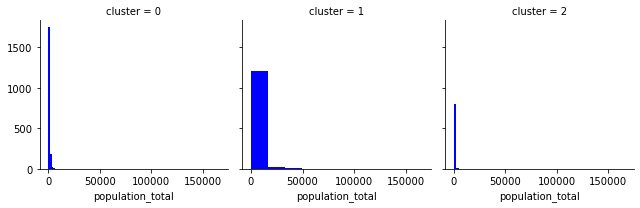

In [64]:
# Distribution de la population totale par Cluster

g = sns.FacetGrid(pca_lyon_kmeans_int, col = 'cluster')
g.map(plt.hist, 'population_total', color = 'blue');

In [ ]:
# le cluster 0 est celui des grandes villes, avec les 4 principales St-Etienne, Grenable, Villeurbanne, Clermont 
# en "outliers" du cluster. 

In [186]:
# villes du cluster 0 triées par population (tri décroissant) 
pca_lyon_kmeans.loc[pca_lyon_kmeans['cluster'] == 0].sort_values('population_total', ascending  = False).head(10)

distance_to_Lyon       nom_commune   latitude  longitude  cluster  \
14197         49.646994     Saint-Etienne  45.433333   4.400000        0   
12650         93.661702          Grenoble  45.166667   5.716667        0   
24788          3.180791      Villeurbanne  45.766667   4.883333        0   
22224        137.053913  Clermont-Ferrand  45.783333   3.083333        0   
24791          7.850071        Vénissieux  45.683333   4.883333        0   
8534          90.873702           Valence  44.933333   4.900000        0   
26156         86.607964          Chambéry  45.566667   5.933333        0   
26365         99.534074            Annecy  45.900000   6.116667        0   
24780          7.449595    Vaulx-en-Velin  45.783333   4.933333        0   
24743          9.159015      Saint-Priest  45.691667   4.933333        0   

       ent_0_sal   nb_ent  personne_seule  population_total  pop_enfants_0_20  \
14197   0.621710  11663.0        0.239748          166137.0          0.238135   
12650   0.652684  13207.0        0.267493          157802.0          0.221651   
24788   0.684216   9440.0        0.226733          144884.0          0.253506   
22224   0.603766  10090.0        0.301752          136506.0          0.218525   
24791   0.608108   3034.0        0.130738           61275.0          0.317193   
8534    0.611008   5923.0        0.238064           60404.0          0.241209   
26156   0.598990   4753.0        0.216407           57669.0          0.250880   
26365   0.653030   5842.0        0.252980           51423.0          0.214651   
24780   0.612452   3357.0        0.116998           44394.0          0.329189   
24743   0.540549   3280.0        0.126098           43958.0          0.280859   

       pop_adultes_20_40  pop_adultes_40_60  pop_adultes_60_80plus  
14197           0.279306           0.227294               0.255265  
12650           0.374419           0.204547               0.199383  
24788           0.360247           0.212591               0.173656  
22224           0.350417           0.220386               0.210672  
24791           0.271465           0.231579               0.179763  
8534            0.267333           0.234968               0.256490  
26156           0.291977           0.235326               0.221818  
26365           0.292768           0.235012               0.257570  
24780           0.287606           0.219962               0.163243  
24743           0.263251           0.246986               0.208904

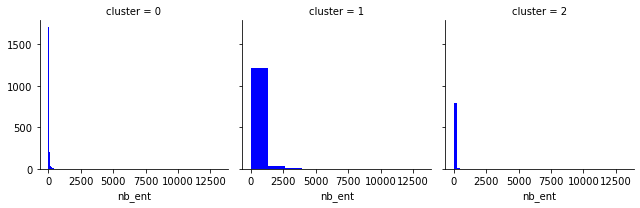

In [65]:
# distribution du nbr d'entreprises par commune par cluster
g = sns.FacetGrid(pca_lyon_kmeans_int, col = 'cluster')
g.map(plt.hist, 'nb_ent', color = 'blue');

In [ ]:
# On note le même type de distribution que pour la population

In [ ]:
## Vu=isualisatio pour les 2 variables les plus corrrélées aux composantes principlaes

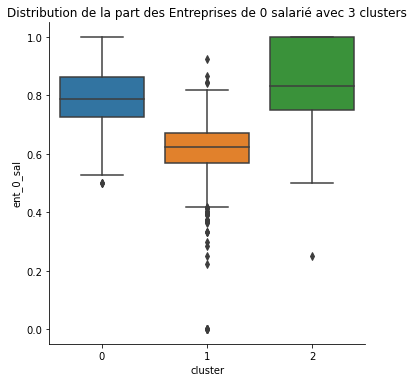

In [68]:
# distribution de la part des entreprises avec  0 salarié par cluster
sns.catplot(x = 'cluster', y = 'ent_0_sal', kind = 'box', data  =pca_lyon_kmeans_int )
plt.title("Distribution de la part des Entreprises de 0 salarié avec 3 clusters");

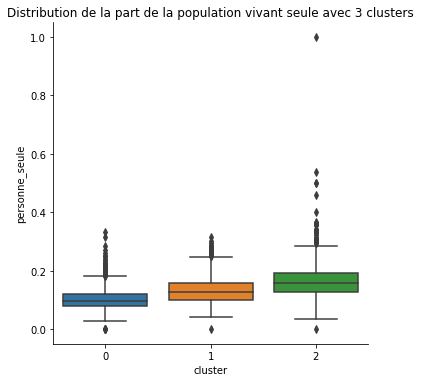

In [71]:
# distribution de la part de la population entre 60 et 80 ans et plus par cluster
sns.catplot(x = 'cluster', y = 'personne_seule', kind = 'box', data  =pca_lyon_kmeans_int )
plt.title("Distribution de la part de la population vivant seule avec 3 clusters");

In [152]:
# Qu'en est-il de la consommation par secteur d'activité : 
# on ajoute les consommation de chaque secteur à pca_lyon_kmeans : 
conso_tertiaire  = df_lyon['consommation_libelle_grand_secteur_tertiaire']
conso_industrielle = df_lyon['consommation_libelle_grand_secteur_industrie']
conso_agricole = df_lyon['consommation_libelle_grand_secteur_agriculture']
conso_totale = df_lyon['consommation_totale']

pca_lyon_kmeans_int['conso_tertiaire'] = conso_tertiaire
pca_lyon_kmeans_int['conso_industrielle'] = conso_industrielle
pca_lyon_kmeans_int['conso_agricole'] = conso_agricole
pca_lyon_kmeans_int['conso_totale'] = conso_totale


In [153]:
pca_lyon_kmeans_int['max_conso'] = np.argmax(
    pca_lyon_kmeans_int[
        [
            'conso_agricole',
            'conso_industrielle',
            'conso_tertiaire',
        ]
    ].values, 
    axis=1)

pca_lyon_kmeans_int['max_conso'] = pca_lyon_kmeans_int['max_conso'].replace({0: 'agriculture', 1: 'industrie', 2: 'tertiaire'})
pca_lyon_kmeans_int.head()


cluster  ent_0_sal  nb_ent  personne_seule  population_total  \
0        2   1.000000     4.0        0.190476              84.0   
1        3   0.701613   124.0        0.104565            2563.0   
2        3   0.583333    48.0        0.106928             664.0   
3        0   0.579317   996.0        0.166493           13460.0   
4        3   0.737374    99.0        0.078370            1595.0   

   pop_enfants_0_20  pop_adultes_20_40  pop_adultes_40_60  \
0          0.190476           0.142857           0.380952   
1          0.263363           0.223956           0.300039   
2          0.257530           0.311747           0.268072   
3          0.267756           0.269094           0.251114   
4          0.228840           0.219436           0.344828   

   pop_adultes_60_80plus  conso_tertiaire  conso_industrielle  conso_agricole  \
0               0.285714         0.000000            0.000000        0.000000   
1               0.212641         0.074916            0.058690        0.013336   
2               0.162651         0.048878            0.000000        0.000000   
3               0.212036         0.283741            0.030682        0.000000   
4               0.206897         0.019037            0.000000        0.021906   

     max_conso  conso_totale  
0  agriculture  2.011133e+03  
1    tertiaire  1.411495e+05  
2    tertiaire  3.160548e+04  
3    tertiaire  1.269513e+06  
4  agriculture  2.468520e+04

In [154]:
pca_lyon_kmeans_int['cluster'].value_counts()

3    1331
0    1204
1    1105
2     407
Name: cluster, dtype: int64

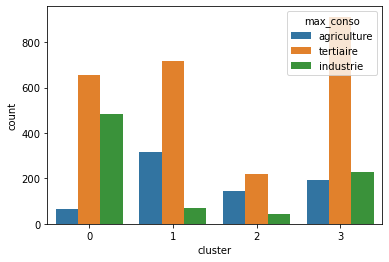

In [166]:

sns.countplot(x = 'cluster', hue = 'max_conso', data = pca_lyon_kmeans_int);



In [ ]:
# pour tous les clusters, les communes avec une activité tertiaire principale sont les plus nombreuses. 

# pour le cluster 2  comprenant 407 villes, près de 40% ont une activité principlalement agricole. 
# il s'agit du cluster où l'activité agricole semble avoir la proportion la plur forte.

# pour le cluster 0 , l'activité industrielle est la deuxième activité la plus représentée. 

In [156]:
#### On calcule la proportion de villes par secteur de max conso
sum_by_cluster = pca_lyon_kmeans_int.groupby('cluster', as_index = False).agg({'max_conso' : 'count',
                                                                                'population_total':'mean',
                                                                               'personne_seule': 'mean',
                                                                                'nb_ent':'mean',
                                                                               'ent_0_sal':'mean',
                                                                               'conso_totale' : 'mean',
                                                                                'conso_tertiaire' : 'mean',
                                                                                'conso_industrielle' : 'mean',
                                                                                'conso_agricole' : 'mean'})
sum_by_cluster

cluster  max_conso  population_total  personne_seule      nb_ent  \
0        0       1204       3818.809801        0.136228  286.210963   
1        1       1105        537.336652        0.127001   30.498643   
2        2        407        370.533170        0.188730   28.054054   
3        3       1331       1018.162284        0.091437   52.897821   

   ent_0_sal   conso_totale  conso_tertiaire  conso_industrielle  \
0   0.609898  387024.156406         0.122785            0.141990   
1   0.853866   24987.021986         0.036833            0.008481   
2   0.835708   25266.026001         0.043520            0.011892   
3   0.762488   47827.105937         0.049554            0.028361   

   conso_agricole  
0        0.006637  
1        0.013323  
2        0.012523  
3        0.009070

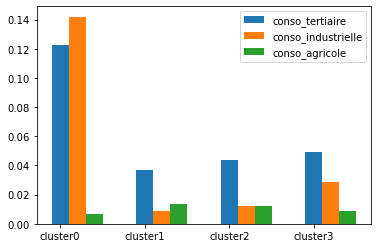

In [179]:

barWidth = 0.2
x1 = [0,1,2,3]

x2 = [e + barWidth for e in x1]

x3 = [e + (2 * barWidth) for e in x1]

plt.bar(x1, sum_by_cluster.conso_tertiaire, width = barWidth, label = 'conso_tertiaire' )
plt.bar(x2,sum_by_cluster.conso_industrielle, width = barWidth, label = 'conso_industrielle')
plt.bar(x3,sum_by_cluster.conso_agricole, width = barWidth, label = 'conso_agricole')
plt.xticks([0,1,2,3], ['cluster0' , 'cluster1', 'cluster2', 'cluster3'])
plt.legend();


